<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment. V.1.5.</b> <a class="tocSkip"></a>
    
Hello Max! Unfortanutely, there are no changes. Please ask her for help, she already has message from me and waiting for you..
    
    

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment. V.1.5.</b> <a class="tocSkip"></a>
    
Hello Max! Thank you for your corretions! But I see that some comments are missing. I will repeat here and send it to your tutor. Please ask her for help.
    
2.2. How many orders do they make during a given period of time?

We have almost correct result in cell 181. Remember that metric is cumulative.

2.3 What is the average purchase size?

We need to show mean revenue here. Without any calculations. Also, please add a monthly graph.

3.1. How much money was spent? Overall, per source and over time.

We need to add monthly graph for costs by source

3.3. How worthwhile where the investments? (ROI)

Please check your calculations for the total ROI. We need to plot classical heatmap.    
    
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Max, thank you for sending your project. You've done a really good job on it! You write a clear code, and plot a good graphs.
    
<span class="text-danger">There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. Could you check my comments?  Do not hesitate to ask your tutor for help, if you have any problems!</span>
    
    
Waiting for the new version!
    
</div>

Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.

</div>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

</div>


# Yandex.Afisha Marketing Expenses Optimization Analysis

# Introduction

This project I will be analysing the Yandex.Afisha datasets with the goal of offering solutions to optimize the marketing expenses

# Steps

The project consists of four main steps:
1. Data overview
2. Data preprocessing
3. Data analysis
4. Conclusion and findings

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great, we have an introsuction!

</div>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Step 1: Data overview

In [2]:
# Visits

In [3]:
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category', 'Source Id': 'category'}, parse_dates=['Start Ts', 'End Ts']) 

In [4]:
visits.head()  

Device              End Ts Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [5]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [6]:
print (visits['Start Ts'].min(), visits['Start Ts'].max())

2017-06-01 00:01:00 2018-05-31 23:59:00


In [7]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [8]:
visits.duplicated().sum()

0

Each row of visits table corresponds to unique session.
The table contains 5 columns, that were downloaded with correct data types: 'category', 'datetime', 'int' and 'uint'.

According to the guidelines:

'Uid' — user's unique identifier 

'Device' — user's device

'Start Ts' — session start date and time

'End Ts' — session end date and time

'Source Id' — identifier of the ad source the user came from



# Orders

In [9]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

In [10]:
orders.head()

Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [11]:
orders.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
print(orders['Buy Ts'].min(), orders['Buy Ts'].max())

2017-06-01 00:10:00 2018-06-01 00:02:00


In [13]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [14]:
orders.duplicated().sum()

0

Each row of orders table corresponds to unique order.
The table contains 3 columns that were downloaded with correct data types: 'float', 'datetime' and 'uint'.

According to the guidelines:

'Uid' — unique identifier of the user making an order

'Buy Ts' — order date and time

'Revenue' — Yandex.Afisha's revenue from the order

# Costs

In [15]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [16]:
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [17]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [18]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
costs.duplicated().sum()

0

# Step 1 conclusions

Our analysis focuses on three interconnected datasets from Yandex.Afisha's digital marketing operations:

First, we have the website visits dataset captured from server logs. This includes each visitor's unique ID, their device type, session timestamps (start and end), and the advertising source that brought them to the site.

Second, the orders dataset tracks customer purchases, containing the buyer's unique ID, the transaction timestamp, and the revenue generated for Yandex.Afisha from each order.

Third, the marketing costs dataset details advertising expenditures, breaking down daily spending by advertising source.

Initial data assessment reveals clean datasets without missing values, though some column names need standardization to follow consistent naming conventions.

There's a timing discrepancy to investigate: while visits and costs data span from June 2017 to May 2018, the orders dataset includes entries dated June 1, 2018. This warrants further investigation in our analysis.

One structural limitation is the lack of a direct session ID linking visits to orders. While we can connect these using user IDs and timestamps, a dedicated session ID would streamline the analysis. This could be a valuable enhancement request for the data team.

For deeper analysis, we'll create additional datetime columns to track activities by week, month, and year, enabling better temporal insights.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done, we checked datasets.

</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please pay attention that we need to check missing values and duplicates in different cells. Please change your code a little.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Thank you!

</div>

# Step 2: Data preprocessing

Renamimg columns 


In [20]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [21]:
visits.columns = visits.columns.str.lower()



In [22]:
   visits = visits.rename(columns={
    'end ts': 'end_ts',
       'start ts': 'start_ts',
    'source id': 'source_id'
})

In [23]:
orders.columns = orders.columns.str.lower()

In [24]:
orders = orders.rename(columns={'buy ts': 'order_ts'})

In [25]:
costs = costs.rename(columns={'dt': 'date'})

Adding new datetime columns for analysis

Visits table

In [26]:
visits['date'] = visits['start_ts'].dt.date

In [27]:
visits['month'] = visits['start_ts'].astype('datetime64[M]')

In [28]:
visits['date'] = pd.to_datetime(visits['date'])

In [29]:
visits['week'] = visits['date'] - pd.to_timedelta(
        visits['date'].dt.dayofweek, unit='d')

In [30]:
first_visit = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()

In [31]:
first_visit.columns = ['uid', 'first_visit_ts']

In [32]:

first_visit['first_visit_date'] = first_visit['first_visit_ts'].dt.date

In [33]:
first_visit['first_visit_month'] = first_visit['first_visit_date'].astype

In [34]:
first_visit['first_visit_date']  = pd.to_datetime(first_visit['first_visit_date'] )

In [35]:
first_visit['first_visit_week'] = first_visit['first_visit_date'] - pd.to_timedelta(
        first_visit['first_visit_date'].dt.dayofweek, unit='d')

In [36]:
visits=visits.merge(first_visit, on = 'uid')

Orders table

In [37]:
orders.columns

Index(['order_ts', 'revenue', 'uid'], dtype='object')

In [38]:
orders['order_date'] = orders['order_ts'].dt.date

In [39]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

It was found earlier that the order table contain information on '2018-06-01' it is probably best to check how many rows are from this date inorder to make sure all three datasets are the same time period

In [40]:
orders[pd.to_datetime(orders['order_date']) == '2018-06-01']

order_ts  revenue                uid  order_date order_month
50414 2018-06-01 00:02:00     3.42  83872787173869366  2018-06-01  2018-06-01

In [41]:
orders = orders[pd.to_datetime(orders['order_date']) != '2018-06-01']

In [42]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_week'] = orders['order_date'] - pd.to_timedelta(
        orders['order_date'].dt.dayofweek, unit='d')

creating a variable for the first order 

In [43]:
first_orders = orders.groupby('uid').agg({'order_ts': 'min'}).reset_index()

In [44]:
first_orders.columns = ['uid', 'first_order_ts']

In [45]:
first_orders['first_order_date'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_date'].astype('datetime64[M]')

In [46]:
first_orders['first_order_date'] = pd.to_datetime(first_orders['first_order_date'])
first_orders['first_order_week'] = first_orders['first_order_date'] - pd.to_timedelta(
        first_orders['first_order_date'].dt.dayofweek, unit='d')

In [47]:
orders=orders.merge(first_orders, on = 'uid')

Costs table

In [48]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')

# conclusions
Column names styles have been changed, lowercased several column names and added underscore between names

I have also added in multiple new datetime columns on all three datasets in order to make the further analysis simpiler 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent! We are ready!
</div>


# Step 3: Data analysis
The main questions needing analysis are:

How people use the product?

When they start to buy?

How much money each customer brings?

When they pay off?

Step 3.1: Product analysis

1. How many people use it every day, week, and month?

2. How many sessions are there per day? (One user might have more than one session.)

3. What is the length of each session?

4. What's the user retention rate?

2. How many people use it every day, week, and month?

In [49]:
sessions_by_month = visits.groupby('month').agg(
    {'uid': ['count', 'nunique']})
sessions_by_month.columns = ['n_sessions', 'n_users']
sessions_by_month = sessions_by_month.reset_index()
sessions_by_month['session_per_user'] = ( sessions_by_month['n_sessions'] / sessions_by_month['n_users'] )

In [50]:
sessions_by_month

month  n_sessions  n_users  session_per_user
0  2017-06-01       16505    13259          1.244815
1  2017-07-01       17828    14183          1.256998
2  2017-08-01       14355    11631          1.234202
3  2017-09-01       23907    18975          1.259921
4  2017-10-01       37903    29692          1.276539
5  2017-11-01       43969    32797          1.340641
6  2017-12-01       41983    31557          1.330386
7  2018-01-01       36939    28716          1.286356
8  2018-02-01       37182    28749          1.293332
9  2018-03-01       35679    27473          1.298693
10 2018-04-01       26515    21008          1.262138
11 2018-05-01       26635    20701          1.286653

In [51]:
sessions_by_month[['n_users', 'n_sessions',
                   'session_per_user']].describe().transpose().round(2)

count      mean       std       min       25%       50%  \
n_users            12.0  23228.42   7546.38  11631.00  17777.00  24240.50   
n_sessions         12.0  29950.00  10307.84  14355.00  22387.25  31157.00   
session_per_user   12.0      1.28      0.03      1.23      1.26      1.28   

                       75%       max  
n_users           28984.75  32797.00  
n_sessions        37362.25  43969.00  
session_per_user      1.29      1.34

In [52]:
sessions_by_month['month'] = sessions_by_month['month'].dt.strftime('%Y-%m')

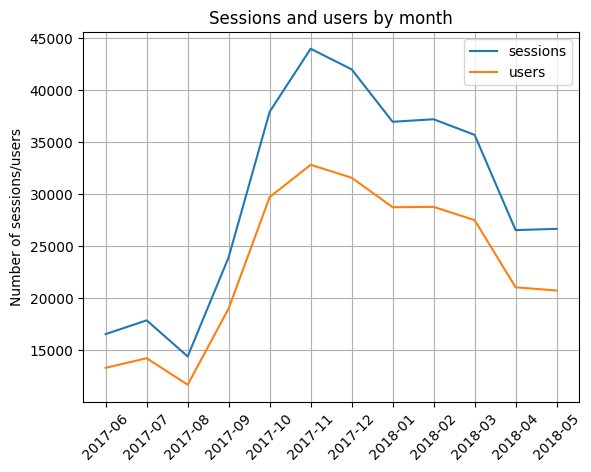

In [53]:
plt.plot(sessions_by_month['month'], sessions_by_month['n_sessions'])
plt.plot(sessions_by_month['month'], sessions_by_month['n_users'])
plt.title('Sessions and users by month')
plt.legend(['sessions', 'users'])
plt.xticks(rotation=45)
plt.ylabel('Number of sessions/users')
plt.grid()
plt.show()

Looking at the app usage data, I notice some clear patterns. What stands out to me first is how both the user count and session numbers move together - when one goes up, the other follows. 

I can see August 2017 was the lowest point in both users and sessions. Things picked up by November 2017.
What concerns me though is the average usage - users are only opening the app about 1.28 times per month. That's quite low and suggests we're not retaining users effectively.

Since I only have data for one year, I can't tell if this August-to-November increase is a seasonal trend that happens every year (maybe due to the holiday season?), or if it was unique to 2017. Having data from multiple years would help me understand if this is a pattern we can expect to repeat.

In [54]:
sessions_by_week = visits.groupby('week').agg(
    {'uid': ['count', 'nunique']})
sessions_by_week.columns = ['n_sessions', 'n_users']
sessions_by_week['session_per_user'] = sessions_by_week['n_sessions'] / \
    sessions_by_week['n_users']
sessions_by_week = sessions_by_week.reset_index()

In [55]:
sessions_by_week.head()

week  n_sessions  n_users  session_per_user
0 2017-05-29        2309     2021          1.142504
1 2017-06-05        4931     4129          1.194236
2 2017-06-12        3214     2812          1.142959
3 2017-06-19        3273     2878          1.137248
4 2017-06-26        3514     3064          1.146867

In [56]:
sessions_by_week[['n_users', 'n_sessions', 'session_per_user']
                 ].describe().transpose().round(2)

count     mean      std      min      25%      50%      75%  \
n_users            53.0  5716.25  2049.90  2021.00  4128.00  5740.00  7401.00   
n_sessions         53.0  6781.13  2549.57  2309.00  4803.00  6768.00  8712.00   
session_per_user   53.0     1.18     0.03     1.14     1.16     1.18     1.19   

                       max  
n_users           10586.00  
n_sessions        13572.00  
session_per_user      1.28

In [57]:
sessions_by_week['week'] = sessions_by_week['week'].dt.strftime('%Y-%m-%d')

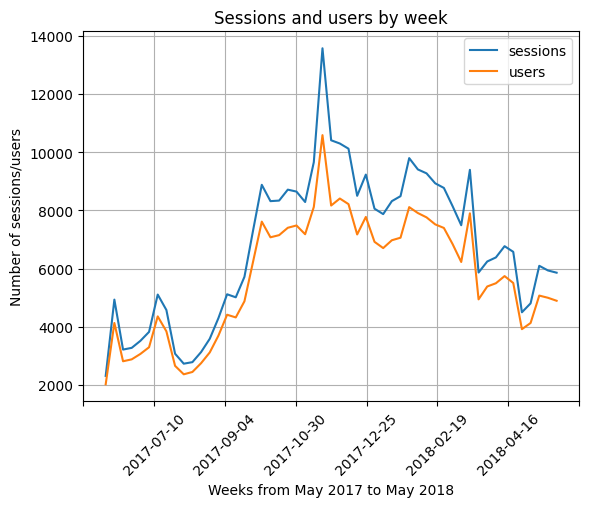

In [58]:
plt.plot(sessions_by_week['week'], sessions_by_week['n_sessions'])
plt.plot(sessions_by_week['week'], sessions_by_week['n_users'])
plt.title('Sessions and users by week')
plt.legend(['sessions', 'users'])
xmin, xmax = plt.xlim()
plt.xticks(np.linspace(xmin, xmax, 8), rotation=45)
plt.ylabel('Number of sessions/users')
plt.xlabel('Weeks from May 2017 to May 2018')
plt.grid()
plt.show()

Looking at the weekly sessions, I notice there's a bit more fluctuation compared to the monthly stats. While there’s an overall peak in November, I can also identify smaller peaks during some weeks in January and March, likely coinciding with weeks when more events took place. The number of users varies, ranging from just over 2,000 to more than 10,000. On average, each user spent 1.18 sessions per week on the app.

In [59]:
sessions_by_day = visits.groupby('date').agg({'uid': ['count', 'nunique']})
sessions_by_day.columns = ['n_sessions', 'n_users']
sessions_by_day = sessions_by_day.reset_index()
sessions_by_day['session_per_user'] = sessions_by_day['n_sessions'] / \
    sessions_by_day['n_users']

In [60]:
sessions_by_day.head()

date  n_sessions  n_users  session_per_user
0 2017-06-01         664      605          1.097521
1 2017-06-02         658      608          1.082237
2 2017-06-03         477      445          1.071910
3 2017-06-04         510      476          1.071429
4 2017-06-05         893      820          1.089024

In [61]:
sessions_by_day['n_sessions'].sum()/sessions_by_day['n_users'].sum()

1.0874136559064957

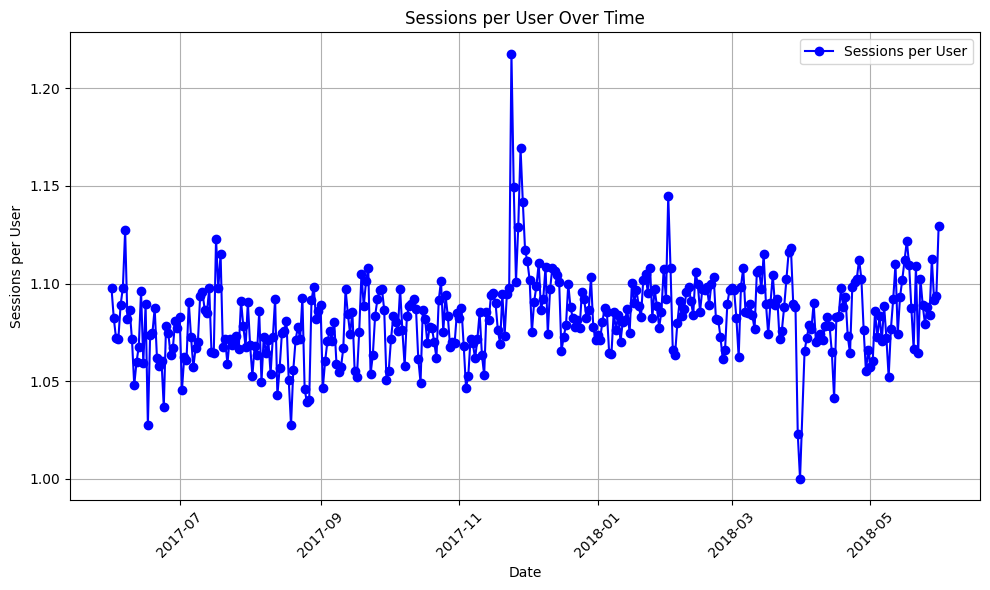

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(sessions_by_day['date'], sessions_by_day['n_sessions'] / sessions_by_day['n_users'], marker='o', color='b', label='Sessions per User')
plt.xlabel('Date')
plt.ylabel('Sessions per User')
plt.title('Sessions per User Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

In [63]:
sessions_by_day[['n_users', 'n_sessions', 'session_per_user']].describe().transpose().round(2)

count    mean     std  min     25%      50%      75%  \
n_users           364.0  907.99  370.51  1.0  594.00   921.00  1173.00   
n_sessions        364.0  987.36  418.99  1.0  635.50  1003.00  1280.00   
session_per_user  364.0    1.08    0.02  1.0    1.07     1.08     1.09   

                      max  
n_users           3319.00  
n_sessions        4042.00  
session_per_user     1.22

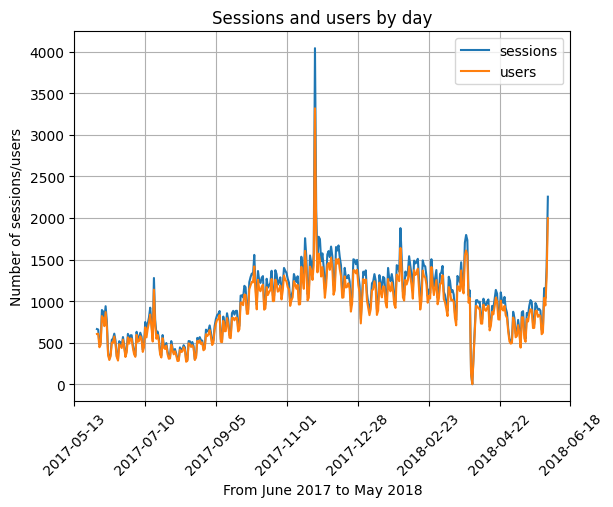

In [64]:
plt.plot(sessions_by_day['date'], sessions_by_day['n_sessions'])
plt.plot(sessions_by_day['date'], sessions_by_day['n_users'])
plt.title('Sessions and users by day')
plt.legend(['sessions', 'users'])
xmin, xmax = plt.xlim()
plt.xticks(np.linspace(xmin, xmax, 8), rotation=45)
plt.ylabel('Number of sessions/users')
plt.xlabel('From June 2017 to May 2018')
plt.grid()
plt.show()

Analysis of daily Sessions and Users data from June 2017 to May 2018 shows an upward trend culminating in a peak during November-December 2017, largely driven by holiday season promotions. A notable spike occurred in late November 2017, followed by a decline through early 2018 before stabilizing in April 2018. The pattern suggests strong seasonal influence on user engagement, with challenges in maintaining consistent activity outside promotional periods.

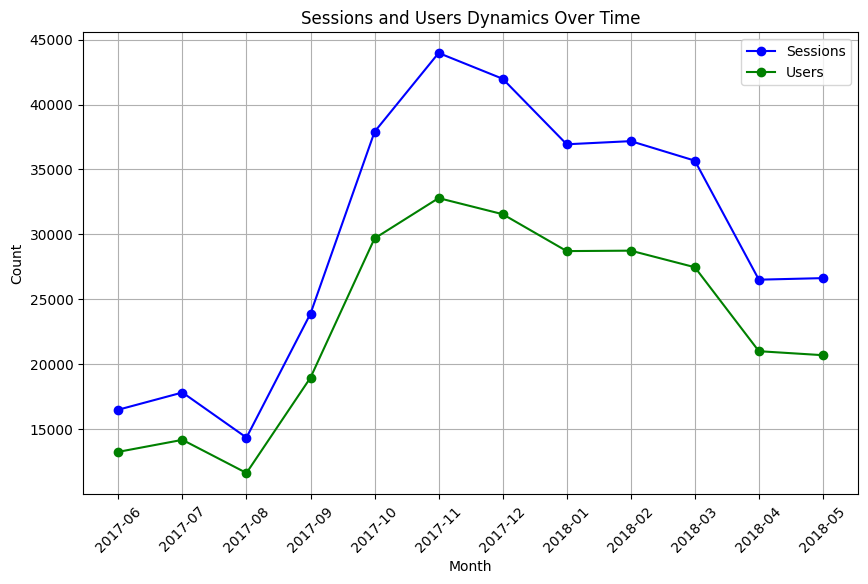

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(sessions_by_month['month'], sessions_by_month['n_sessions'], label='Sessions', marker='o', color='blue')
plt.plot(sessions_by_month['month'], sessions_by_month['n_users'], label='Users', marker='o', color='green')


plt.title('Sessions and Users Dynamics Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

The analysis of Sessions and Users data shows synchronized movement between both metrics throughout the period. Starting from a low point in August 2017, both metrics increased to reach their peak during the holiday season (November-December 2017), driven by seasonal promotions. After December, engagement declined and stabilized around April 2018. While marketing campaigns effectively boosted engagement during peak seasons, maintaining user activity during off-peak periods remains a challenge.

Looking at the previous graphs for monthly and weekly sessions, I can see that there are certain periods where the app usage spiked more than others. I wonder if it could be tied to a specific day. The plot of daily sessions shows that most days have fewer than 1,500 sessions and users, but there’s one day with an exceptionally high number (over 4,000), which likely boosted the weekly and monthly session totals for the period that included that day. There are also some days with extremely low user numbers. I’ll take a closer look at when these occurred.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

It looks like you answered on Q 1.2 because we see a number of sessions per day per user. Please move results, add one graph here, and do not forget to change your conclusion a little.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

So, here we should show values and graphs for DAU/WAU/MAU. And for Q 1.2 our answer is cell 61: 1.08. 

</div>
    
<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

And we need to plot a graph for the sessions/users value to see dynamics.

</div>
  
    
<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Well done!
</div>

I see now that i did confuse the two questions. I have changed the numbering of the questions because I am unsure how to swap the codes around. 

1. How many people use Yandex.Afisha every day, week, and month?

Using the visits data, we can also find out how many unique visits the app gets daily, weekly, and monthly. This tells to what extent the app is interesting to users who aren't yet familiar with it. I will be using three metrics here:

DAU — the number of daily active (unique) users

WAU — the number of weekly active users

MAU — the number of monthly active users

Then we can use the above to calculate the sticky factor, which indicates how loyal the audience is.

In [66]:
visits.groupby('date').agg({'uid': 'nunique'}).min()

uid    1
dtype: int64

In [67]:
dau = visits.groupby('date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby('week').agg({'uid': 'nunique'}).mean()
mau = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print('daily active users: {0}\nweekly active users: {1}\nmonthly active users: {2}'.format(
    float(dau), float(wau), float(mau)))

daily active users: 907.9917582417582
weekly active users: 5716.245283018868
monthly active users: 23228.416666666668


In [68]:
print('Sticky factor expressed as the ratio of daily and weekly active users : {0}'.format(
    float(dau/wau*100)))
print('Sticky factor expressed as the ratio of daily and monthly active users : {0}'.format(
    float(dau/mau*100)))

Sticky factor expressed as the ratio of daily and weekly active users : 15.88440861589881
Sticky factor expressed as the ratio of daily and monthly active users : 3.908969652437603


The user stickiness doesn’t seem very promising, which suggests the company might be facing an issue with customer loyalty. 
This, however, is likely beyond the marketing department’s control.
I wonder if the products are designed to encourage repeat purchases and whether the strategies in place effectively engage existing customers. 
There’s a lot to consider here.

In [69]:
dau = visits.groupby('date')['uid'].nunique().reset_index(name='DAU')
wau = visits.groupby('week')['uid'].nunique().reset_index(name='WAU')
mau = visits.groupby('month')['uid'].nunique().reset_index(name='MAU')

# Add 'type' column for easier concatenation
dau['type'] = 'DAU'
wau['type'] = 'WAU'
mau['type'] = 'MAU'

# Renaming columns to standardize 
dau.rename(columns={'date': 'time', 'DAU': 'active_users'}, inplace=True)
wau.rename(columns={'week': 'time', 'WAU': 'active_users'}, inplace=True)
mau.rename(columns={'month': 'time', 'MAU': 'active_users'}, inplace=True)

# Combine data in one dataframe
active_users = pd.concat([dau, wau, mau])

fig = px.line(
    active_users,
    x='time',
    y='active_users',
    color='type',
    title='DAU, WAU, and MAU Over Time',
    labels={'time': 'Time', 'active_users': 'Number of Active Users'}
)

fig.show()

The graph of Daily Active Users (DAU), Weekly Active Users (WAU), and Monthly Active Users (MAU) over time reveals important insights into user engagement.

Overall Trend: The MAU line shows that the number of monthly users steadily increased from June 2017 through December 2017, peaking around the holiday season. After this, there was a slight decline in early 2018, followed by a period of stabilization. This suggests a seasonal trend or the impact of marketing campaigns during key periods.

DAU and WAU Patterns: Both DAU and WAU mirror the overall trend of MAU, with noticeable spikes during the holiday period and some smaller peaks at other times. The close movement between these metrics indicates consistent user behavior across different time frames.

User Stickiness: The relatively lower DAU compared to WAU and MAU highlights potential challenges in daily app engagement. This suggests that users may be visiting infrequently, possibly due to a lack of regular engagement incentives.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Values are correct.

</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please pay attention that this is Q 1.1. Not 1.2. Also, please add graphs for the dau/wau/mau, and do not forget about conclusion.

</div>

3. What is the length of each session?

In [70]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [71]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

While 75% of the sessions last 840 seconds (14 minutes) or less, there’s one session that lasts a whopping 84,480 seconds (almost a full day), which seems unusual. The distribution is definitely right-skewed. I’ll take a closer look at the histogram to explore this further, setting the range to under 3,000 seconds.

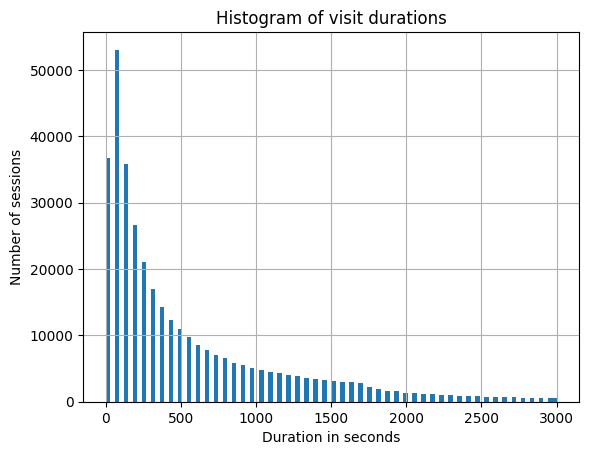

In [72]:
visits['session_duration'].hist(bins=100, range=(0, 3000))
plt.title('Histogram of visit durations')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of sessions')
plt.show()

From the stats and histogram above we get to know that half of the users used the app for 5 minuts and under, 75% under 14 minutes. Somewhere between 0 and 100 seems to be the most popular session length.

In [73]:
visits['session_duration'].mode()

0    60
dtype: int64

A typical session duration is 60 seconds. This seems to be a little short if any orders are to happen.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>




4. What's the user retention rate?

In [74]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['month'] = visits['month'].astype('datetime64[M]')

In [75]:
visits['cohort_lifetime'] = (visits['month'] - visits['first_visit_month'])/np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [76]:
##Using groupby, we will find out the number of unique users per month for each cohort
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({
    'uid': 'nunique'}).reset_index()

In [77]:
##Let's get the initial users' count, which is when 'cohort_lifetime' is 0.
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]

In [78]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [79]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [80]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [81]:
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m')

In [82]:
##creating a pivot table and heatmap from above data
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

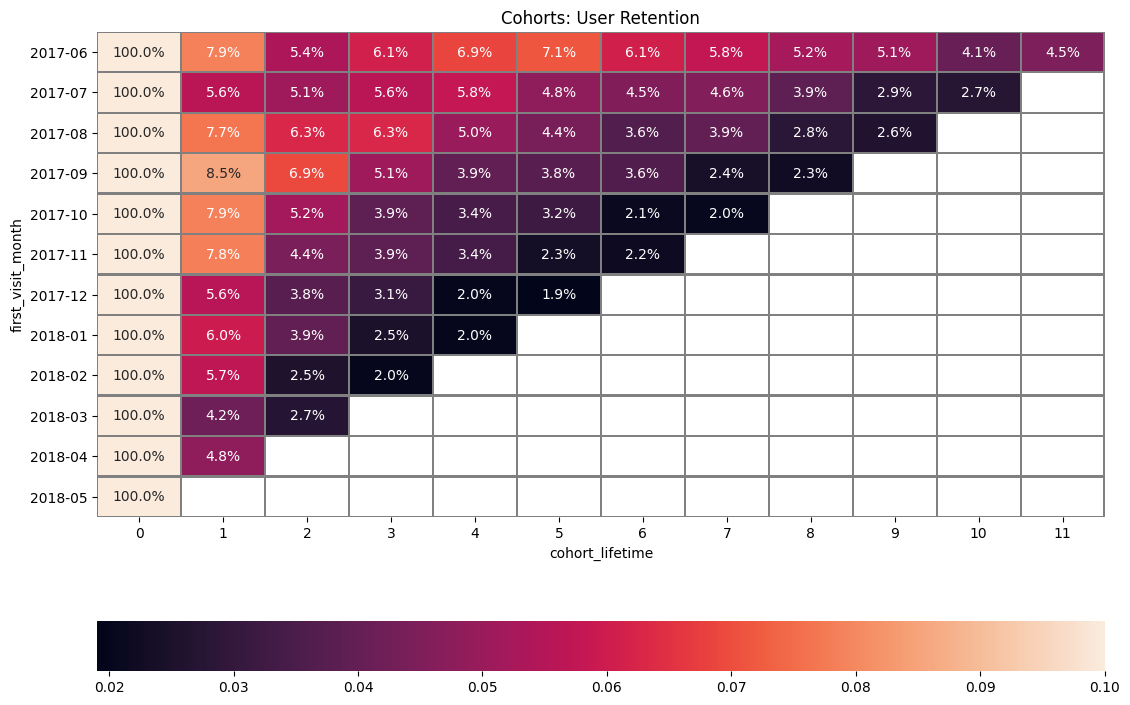

In [83]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
           vmax=0.1, cbar_kws= {'orientation': 'horizontal'})
plt.show()

In [84]:
retention_pivot.mean(axis=0)

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

Except for the first two cohorts, where the retention rate increased after an initial drop, all other cohorts show an initial drop followed by a gradual decline in retention rates. 

For the larger cohorts (like October 2017 to March 2018), the retention rates actually seem to be lower than the others.

This confirms the suspicion we had earlier: users aren’t sticking with the app. This is something that should be addressed with the marketing or app service department. One potential next step for investigating user retention is to analyze it by ad source. Since we’ll be looking at this later when analyzing user revenues, I’ll skip that for now.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Values are not big, but this is life. Great!

</div>



# Step 3 conclusion 
The app shows fluctuating usage, with weekly sessions varying more than monthly stats. November had a significant peak, and there were smaller spikes in January and March, likely due to more events. User numbers ranged from 2,000 to 10,000, with an average of 1.18 sessions per week.

Daily sessions mostly had fewer than 1,500 sessions, but one day had over 4,000, which likely inflated the overall numbers. There were also days with low user counts that need further analysis.

User retention is a concern, as there's a lack of loyalty, possibly due to product design or engagement strategies. Session lengths are generally short, with a few outliers, and the distribution is right-skewed. Retention rates have declined, particularly for larger cohorts, confirming the issue of user drop-off. This needs to be addressed by marketing or app services, and analyzing retention by ad source can provide more insights later.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good taht we have a conclusion after the first part.
</div>



# Step 4:
When do people start buying? Or What is the time that elapsed between first visit and first order?

How many orders do they make during a given period of time?

What is the average purchase size?

How much money do they bring? (LTV)

This information will give insights on the business' financial health.

1. When do people start buying? Or What is the time that elapsed between first visit and first order?

In [85]:
visit_to_order = pd.merge(first_visit, first_orders, on='uid')


visit_to_order.head()

uid      first_visit_ts first_visit_date  \
0   313578113262317 2017-09-18 22:49:00       2017-09-18   
1  1575281904278712 2017-06-03 10:13:00       2017-06-03   
2  2429014661409475 2017-10-11 17:14:00       2017-10-11   
3  2464366381792757 2018-01-27 20:10:00       2018-01-27   
4  2551852515556206 2017-11-24 10:14:00       2017-11-24   

                                   first_visit_month first_visit_week  \
0  <bound method NDFrame.astype of 0         2018...       2017-09-18   
1  <bound method NDFrame.astype of 0         2018...       2017-05-29   
2  <bound method NDFrame.astype of 0         2018...       2017-10-09   
3  <bound method NDFrame.astype of 0         2018...       2018-01-22   
4  <bound method NDFrame.astype of 0         2018...       2017-11-20   

       first_order_ts first_order_date first_order_month first_order_week  
0 2018-01-03 21:51:00       2018-01-03        2018-01-01       2018-01-01  
1 2017-06-03 10:13:00       2017-06-03        2017-06-01       2017-05-29  
2 2017-10-11 18:33:00       2017-10-11        2017-10-01       2017-10-09  
3 2018-01-28 15:54:00       2018-01-28        2018-01-01       2018-01-22  
4 2017-11-24 10:14:00       2017-11-24        2017-11-01       2017-11-20

In [86]:
(visit_to_order['uid'].nunique()/visits['uid'].nunique())*100

16.0065565436146

Around 16% of users who have used the app have actually made at least an order.

In [87]:
visit_to_order['lapsed_days'] = (visit_to_order['first_order_date'] - \
    visit_to_order['first_visit_date']).dt.days

In [88]:
visit_to_order['lapsed_days'].describe()

count    36522.000000
mean        16.896336
std         47.071771
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: lapsed_days, dtype: float64

In [89]:
#Dividing into 3 main groups
same_day_conversion = visit_to_order[visit_to_order['lapsed_days'] == 0]['uid']

two_day_conversion = visit_to_order[(visit_to_order['lapsed_days'] <= 2) & (visit_to_order['lapsed_days'] > 0)]['uid']

other_conversion = visit_to_order[visit_to_order['lapsed_days'] > 2]['uid']

In [90]:
#Same day 
visits[visits['uid'].isin(same_day_conversion)
      ]['device'].value_counts()/len(visits[visits['uid'].isin(same_day_conversion)])*100


desktop    81.119842
touch      18.880158
Name: device, dtype: float64

In [91]:
#Two days
visits[visits['uid'].isin(two_day_conversion)]['device'].value_counts(
)/len(visits[visits['uid'].isin(two_day_conversion)])*100

desktop    78.058406
touch      21.941594
Name: device, dtype: float64

In [92]:
#All others
visits[visits['uid'].isin(other_conversion)]['device'].value_counts(
)/len(visits[visits['uid'].isin(other_conversion)])*100

desktop    79.812728
touch      20.187272
Name: device, dtype: float64

As a whole it seems that more users are placing orders on desktops rather than mobile

In [93]:
DF1 = (visits[visits['uid'].isin(same_day_conversion)]['source_id'].value_counts(
)/len(visits[visits['uid'].isin(same_day_conversion)])).to_frame().reset_index()
DF1.columns = ['source_id', 'same_day_conversion(%)']

In [94]:
DF2 = (visits[visits['uid'].isin(two_day_conversion)]['source_id'].value_counts(
)/len(visits[visits['uid'].isin(two_day_conversion)])).to_frame().reset_index()
DF2.columns = ['source_id', 'two_day_conversion(%)']

In [95]:
DF3 = (visits[visits['uid'].isin(other_conversion)]['source_id'].value_counts(
)/len(visits[visits['uid'].isin(other_conversion)])).to_frame().reset_index()
DF3.columns = ['source_id', 'other_conversion(%)']

In [96]:

all_conversion=pd.merge(DF1, DF2, on='source_id', how ='outer')
all_conversion=all_conversion.merge(DF3, on='source_id', how='outer')

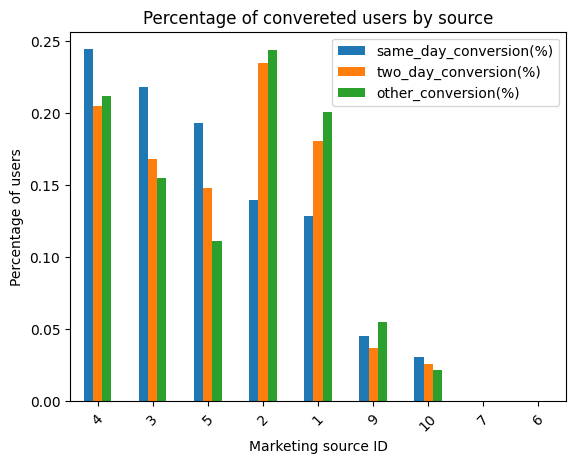

In [97]:
all_conversion.plot(x='source_id', kind='bar')
plt.title('Percentage of convereted users by source')
plt.ylabel('Percentage of users')
plt.xlabel('Marketing source ID')
plt.xticks(rotation=45)
plt.show()

The exact meaning of the source_id is unclear, but it appears that ad source 4 is driving the highest number of same-day conversion users. It also performs well for the other two groups, coming in second after ad source 2. Both ad source 4 and possibly ad source 2 should be closely examined by the marketing department.

On the other hand, ad source 7 is performing poorly, with only one visit-to-order conversion, and ad source 10 isn't doing much better. These sources will need special attention.

Later in the report, we will analyze how different advertising sources contribute to generating profits.

We now know how long users typically wait from their first visit to their first purchase, and we'll also explore when users generally make purchases in relation to their first visit. Since a significant number of orders occur on day 0, we'll measure this duration in hours.

In [98]:
delay_in_order = orders[['uid', 'order_ts']].merge(
    first_visit[['uid', 'first_visit_ts']], how='left', on='uid')

In [99]:
delay_in_order['lapse'] = (delay_in_order['order_ts'] -
                           delay_in_order['first_visit_ts']).astype('timedelta64[h]')


In [100]:
delay_in_order['lapse'].describe()

count    50414.000000
mean       888.562661
std       1694.595176
min          0.000000
25%          0.000000
50%          3.000000
75%        921.000000
max       8744.000000
Name: lapse, dtype: float64

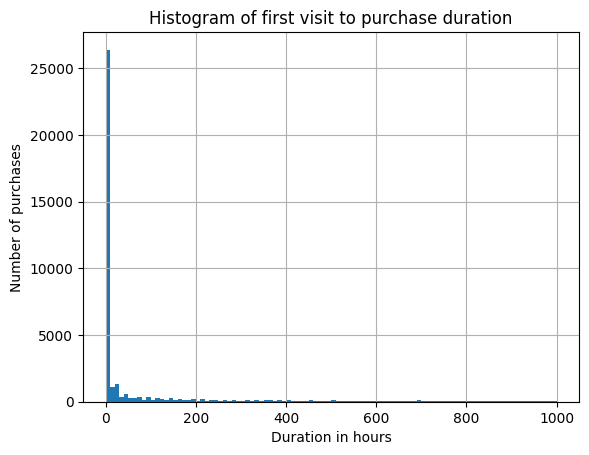

In [101]:
delay_in_order['lapse'].hist(bins=100, range=(0, 1000))
plt.title('Histogram of first visit to purchase duration')
plt.xlabel('Duration in hours')
plt.ylabel('Number of purchases')
plt.show()

Half of all purchases were made within three hours of users' first visit to the app. The app is doing okay in driving people to purchase. The key concern remains user retention.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Yes, our customers are fast!

</div>


2. How many orders do they make during a given period of time?

In [102]:
#orders_per_month
orders_per_month = orders.groupby('order_month').agg({'uid': ['count', 'nunique']}).reset_index()
orders_per_month.columns = ['order_month', 'n_purchases', 'n_users']

In [103]:
orders_per_month['orders_per_user'] = orders_per_month['n_purchases'] / orders_per_month['n_users'] 

In [104]:
orders_per_month['orders_per_user'].describe()

count    12.000000
mean      1.222975
std       0.030695
min       1.163618
25%       1.206547
50%       1.226940
75%       1.241329
max       1.273858
Name: orders_per_user, dtype: float64

In [105]:
orders_per_month['order_month'] = orders_per_month['order_month'].dt.strftime('%Y-%m')

In [106]:
orders_per_month['n_purchases']

0     2354
1     2363
2     1807
3     3387
4     5679
5     5659
6     6218
7     4721
8     5281
9     5326
10    3273
11    4346
Name: n_purchases, dtype: int64

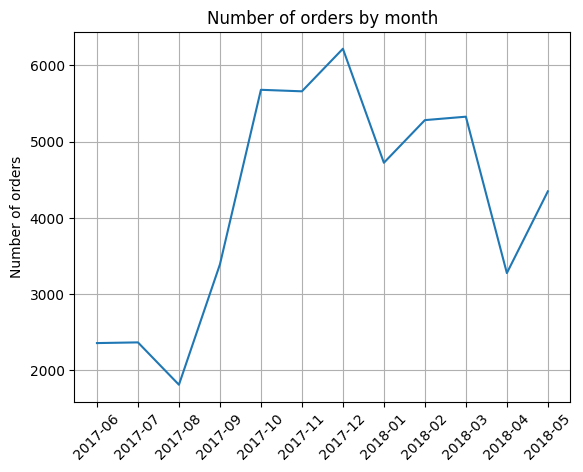

In [107]:
plt.plot(orders_per_month['order_month'], orders_per_month['n_purchases'])
plt.title('Number of orders by month')
plt.xticks(rotation=45)
plt.ylabel('Number of orders')
plt.grid()
plt.show()

As shown above, on average, a user made just over an order per month. On a monthly basis, the lowest number of orders occured in August, 2017, which is the same as when the app had the lowest number of visits. The highest number of orders were made in December 2017, where, as we previously mentioned, were two weeks after the highest marketing spending.

Overall, between October 2017 to March 2018 we see a higher number of orders, compared with other months of the year.

The decline in orders after December 2017 is a little concerning. We would expect that as more cohorts roll in, the orders by month will keep a upward trend but this is obviously not the case here. The external factors might be worth investigating too. For example, are there less events happening during these months, compared to the sales peak month? 

Now, let's take a look at how each cohort performs in generating sales. We will create a variable showing the number of orders by month for each monthly cohort

In [108]:
 cohort_sizes = orders.groupby('first_order_month').agg(
    {'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','n_buyers']

In [109]:
cohorts_orders = orders.groupby(['first_order_month', 'order_month']).agg(
    {'uid':['count','nunique']}).reset_index()
cohorts_orders.columns=['first_order_month', 'order_month', 'n_purchases','n_active_buyers']

In [110]:
cohorts_orders['cohort_lifetime'] = (cohorts_orders['order_month'] - cohorts_orders['first_order_month']
                                     ) / np.timedelta64(1, 'M')
cohorts_orders['cohort_lifetime'] = cohorts_orders['cohort_lifetime'].round().astype('int')

In [111]:
cohorts_orders=cohorts_orders.merge(cohort_sizes, on='first_order_month')

In [112]:
cohorts_orders['purchase_per_cohort_user'] = cohorts_orders['n_purchases'] / cohorts_orders['n_buyers']

In [113]:
cohorts_orders['purchase_per_user'] = cohorts_orders['n_purchases'] / cohorts_orders['n_active_buyers']

In [114]:
cohorts_orders['first_order_month'] = cohorts_orders['first_order_month'].dt.strftime('%Y-%m')

In [115]:
#making a pivot table showing how the orders made by each cohort changes over their lifetime.
orders_pivot = cohorts_orders.pivot_table(index='first_order_month', columns='cohort_lifetime',
                                          values='n_purchases', aggfunc='mean')

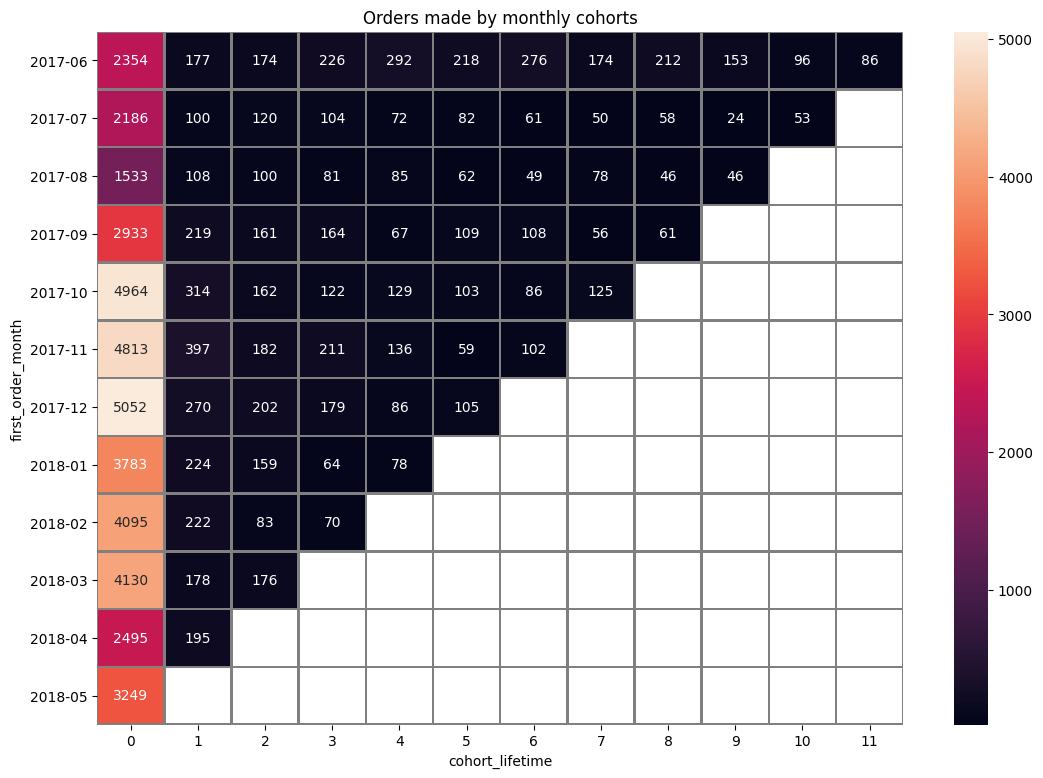

In [116]:
plt.figure(figsize=(13, 9))
plt.title('Orders made by monthly cohorts')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='grey') 
plt.yticks(rotation=0)
plt.show()

It can be seen from the above graph that most grouping show a slight increase in orders after an initial drop following their first month. 

However, examining cohort lifetime 5 reveals that despite having the highest initial orders from October to December 2017, the cohort's order volume significantly decreased by the sixth month, becoming comparable to or even worse than other cohorts.

Next, let's see how orders per user changed month by month

In [117]:
average_order_pivot = cohorts_orders.pivot_table(index='first_order_month',
                                                 columns='cohort_lifetime',
                                                 values='purchase_per_user',
                                                 aggfunc='mean').round(2)

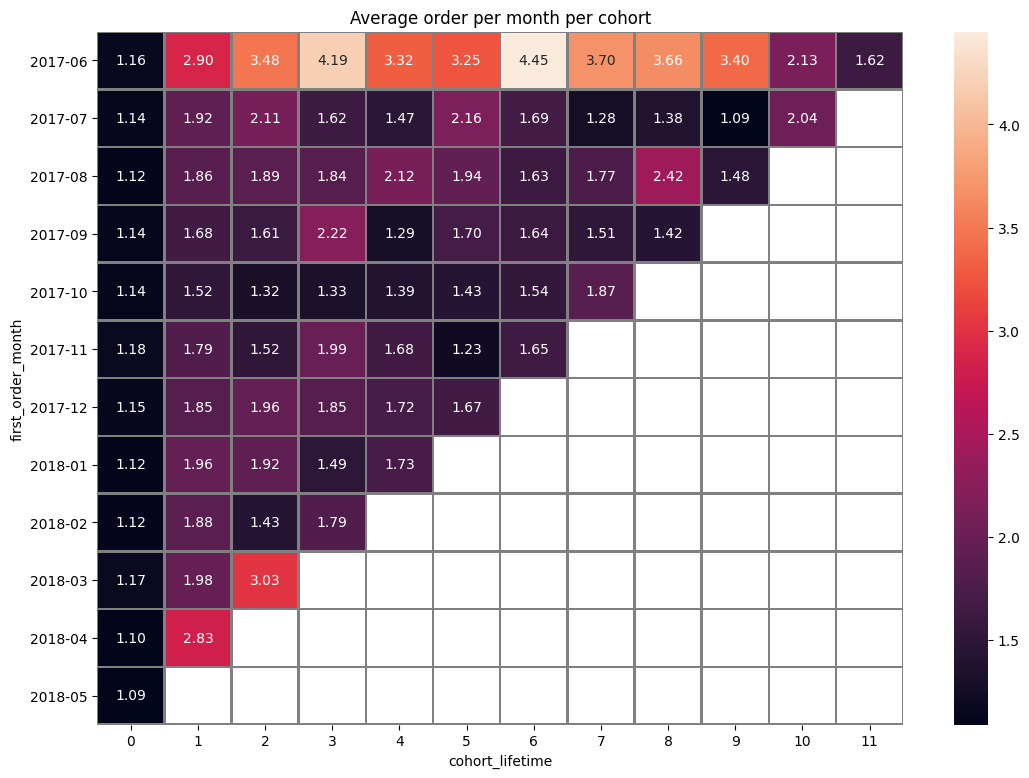

In [118]:
plt.figure(figsize=(13, 9))
plt.title('Average order per month per cohort')
sns.heatmap(average_order_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey') 
plt.yticks(rotation=0)
plt.show()

In [119]:
(cohorts_orders['n_purchases'].sum()/cohorts_orders['n_active_buyers'].sum()).round(2)

1.23

The first cohort outperformed others, with average purchases per active user exceeding 4 for two months and consistently above 3 for eight months. Other cohorts mostly averaged below 2 purchases. While March and April cohorts approached or surpassed 3 purchases, their recent entry makes long-term performance prediction challenging.

Overall, buyers averaged 1.23 orders during the analyzed period. To gain deeper insights, we'll create a pivot table examining cohort performance by month, accounting for initial cohort size and tracking performance throughout their lifetime.

In [120]:
average_order_cohort_pivot = cohorts_orders.pivot_table(index='first_order_month',
                                                 columns='cohort_lifetime',
                                                 values='purchase_per_cohort_user',
                                                 aggfunc='mean').round(2)
average_order_cohort_pivot

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06            1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09  0.10  0.08   
2017-07            1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08            1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09            1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02   NaN   
2017-10            1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03   NaN   NaN   
2017-11            1.18  0.10  0.04  0.05  0.03  0.01  0.02   NaN   NaN   NaN   
2017-12            1.15  0.06  0.05  0.04  0.02  0.02   NaN   NaN   NaN   NaN   
2018-01            1.12  0.07  0.05  0.02  0.02   NaN   NaN   NaN   NaN   NaN   
2018-02            1.12  0.06  0.02  0.02   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03            1.17  0.05  0.05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04            1.10  0.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05            1.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime      10    11  
first_order_month              
2017-06            0.05  0.04  
2017-07            0.03   NaN  
2017-08             NaN   NaN  
2017-09             NaN   NaN  
2017-10             NaN   NaN  
2017-11             NaN   NaN  
2017-12             NaN   NaN  
2018-01             NaN   NaN  
2018-02             NaN   NaN  
2018-03             NaN   NaN  
2018-04             NaN   NaN  
2018-05             NaN   NaN

In [121]:
cumulative_metric_pivot = average_order_cohort_pivot.cumsum(axis=1)
cumulative_metric_pivot.round(2).fillna('')

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06            1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.93  2.03  2.11   
2017-07            1.14  1.19  1.25   1.3  1.34  1.38  1.41  1.44  1.47  1.48   
2017-08            1.12   1.2  1.27  1.33  1.39  1.44  1.48  1.54  1.57   1.6   
2017-09            1.14  1.22  1.28  1.34  1.37  1.41  1.45  1.47  1.49         
2017-10            1.14  1.21  1.25  1.28  1.31  1.33  1.35  1.38               
2017-11            1.18  1.28  1.32  1.37   1.4  1.41  1.43                     
2017-12            1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01            1.12  1.19  1.24  1.26  1.28                                 
2018-02            1.12  1.18   1.2  1.22                                       
2018-03            1.17  1.22  1.27                                             
2018-04            1.10  1.19                                                   
2018-05            1.09                                                         

cohort_lifetime      10   11  
first_order_month             
2017-06            2.16  2.2  
2017-07            1.51       
2017-08                       
2017-09                       
2017-10                       
2017-11                       
2017-12                       
2018-01                       
2018-02                       
2018-03                       
2018-04                       
2018-05

In [122]:
average_order_cohort_pivot.mean(axis=0)

cohort_lifetime
0     1.135833
1     0.072727
2     0.053000
3     0.048889
4     0.046250
5     0.041429
6     0.048333
7     0.046000
8     0.045000
9     0.040000
10    0.040000
11    0.040000
dtype: float64

In [123]:
average_order_cohort_pivot.sum(axis=0)

cohort_lifetime
0     13.63
1      0.80
2      0.53
3      0.44
4      0.37
5      0.29
6      0.29
7      0.23
8      0.18
9      0.12
10     0.08
11     0.04
dtype: float64

In [124]:
orders.head(2)

order_ts  revenue                   uid order_date order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01  2017-06-01   

  order_week      first_order_ts first_order_date first_order_month  \
0 2017-05-29 2017-06-01 00:10:00       2017-06-01        2017-06-01   
1 2017-05-29 2017-06-01 00:25:00       2017-06-01        2017-06-01   

  first_order_week  
0       2017-05-29  
1       2017-05-29

In [125]:
orders['orders_year'] = orders['order_ts'].dt.year
orders['orders_month'] = orders['order_ts'].dt.month

In [126]:
orders_per_user = orders.groupby(['orders_year','orders_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_per_user.columns = ['orders_year','orders_month','n_orders', 'n_buyers']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_buyers']

In [127]:
orders_per_user.head()

orders_year  orders_month  n_orders  n_buyers  orders_per_user
0         2017             6      2354      2023         1.163618
1         2017             7      2363      1984         1.191028
2         2017             8      1807      1472         1.227582
3         2017             9      3387      2750         1.231636
4         2017            10      5679      4675         1.214759

When examining initial cohort size, user orders rapidly declined to below 0.1 in the second month and never recovered. This confirms our previous concern: customers don't sustain engagement. While some return to make additional purchases, the retention rate is insufficient.

This trend is potentially alarming. Regardless of marketing's success in initial customer acquisition, low customer retention means marketing expenses won't be recouped. 

Next, we'll analyze customer value using the Lifetime Value (LTV) metric to understand the financial impact of these purchasing patterns.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You are on the right way!
    
Please pay attention that this metric is cumulative.</div>

I am not 100% sure I understood correctly what was missing. if there is an error please let me know more 

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>


For oredrs number we need:
    
- find the number of buyers in each cohort
- group orders by first order month and order_month and count revenue
- calculate age of each cohort
- add the number of buyers in each cohort to the cohort report
- count the number of orders per customer (Please pay attention that this metric is cumulative.)

    
And we lost one question: "2.3. What is the average purchase size?"  I see information about it in your conclusion but where is the code and the graph? Please return them.
</div>
    
<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>


Cell 181 is almost correct. Remember that metric is cumulative. 
</div>
    
<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>


Well done!</div>

2.3 What is the average purchase size

In [128]:
first_order_day = orders.groupby('uid')['order_ts'].min()
first_order_day.name = 'first_order_day'


In [129]:
orders = orders.join(first_order_day, on='uid', rsuffix='_right')

In [130]:
orders['first_order_month'] = orders['first_order_day'].astype('datetime64[M]')
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')

In [131]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()


In [132]:
avg_check=orders.groupby(['order_month'])['revenue'].mean().reset_index()

In [133]:
#orders_grouped_by_cohorts['order_month'] = orders_grouped_by_cohorts['first_order_month'].astype('datetime64[M]')

#mean_revenue_by_month = orders_grouped_by_cohorts.groupby('order_month')['revenue'].mean().reset_index()

fig = px.line(
    avg_check,
    x='order_month',
    y='revenue',
    title='Monthly Mean Revenue Over Time',
    labels={'order_month': 'Month', 'revenue': 'Mean Revenue ($)'},
    markers=True
)
fig.add_hline(y=avg_check['revenue'].mean(),line_dash="dash", line_color="red", annotation_text="average revenue",
             annotation_position="top left")
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Mean Revenue ($)',
    template='plotly_white'
)
fig.update_yaxes(range=[0, 6], dtick=0.5)
fig.show()


Analysis of mean monthly revenue reveals patterns in customer spending over time. Where revenue trends upward, it suggests improved customer engagement or larger purchases, while peaks often correlate with promotional periods or holidays. Declining revenue periods indicate potential issues with customer spending or engagement. This monthly analysis helps identify performance patterns and guide strategic planning.

In [134]:
mean_revenue_by_month = orders_grouped_by_cohorts.groupby('order_month')['revenue'].mean().reset_index()
print(mean_revenue_by_month.mean())

revenue    4170.997646
dtype: float64


In [135]:
print(orders['revenue'].mean())
print(orders['revenue'].describe())

4.999678263974293
count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64


The revenue data reveals that the average purchase size is approximately 5.00 per order, with a wide range from 0 to a maximum of 2,633.28. The median revenue is 2.50, which is notably lower than the mean, indicating a right-skewed distribution where a few high-value transactions are driving up the overall average. Most orders fall within the interquartile range of 1.22 to 4.89, suggesting that the majority of purchases are relatively small. The standard deviation of 21.82 further highlights significant variation in order sizes. This distribution suggests the presence of outliers or large transactions, which could warrant further analysis to better understand customer behavior and purchasing patterns.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>


We need to show mean revenue here. Without any calculations. Also, please add a monthly graph.</div>

4. How much money do they bring? (LTV)

In [136]:
orders['revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [137]:
orders['revenue'].mode()

0    1.83
dtype: float64

I notice that the purchase value distribution shows an interesting pattern - while 75% of purchases fall below 5, there are some notably high-value outliers. This raises questions about the validity of these extreme values, though without additional context about the app's nature, we can't make definitive conclusions.

Looking at the statistics, the median purchase value is 2.5, while the mean is considerably higher at 4.99, likely skewed by these large outliers. The typical purchase amount comes in at 1.83.

To better understand these purchasing patterns, I'll examine how the average purchase size chamges from month to month.

In [138]:
purchase_by_month = orders.groupby('order_month').agg({'revenue': ['count', 'sum']}).reset_index()
purchase_by_month.columns = ['order_month', 'n_orders', 'sum_revenue']

In [139]:
purchase_by_month['average_purchase_size'] = purchase_by_month['sum_revenue'] / purchase_by_month['n_orders']

In [140]:
purchase_by_month

order_month  n_orders  sum_revenue  average_purchase_size
0   2017-06-01      2354      9557.49               4.060106
1   2017-07-01      2363     12539.47               5.306589
2   2017-08-01      1807      8758.78               4.847139
3   2017-09-01      3387     18345.51               5.416448
4   2017-10-01      5679     27987.70               4.928280
5   2017-11-01      5659     27069.93               4.783518
6   2017-12-01      6218     36388.60               5.852139
7   2018-01-01      4721     19417.13               4.112927
8   2018-02-01      5281     25560.54               4.840095
9   2018-03-01      5326     28834.59               5.413930
10  2018-04-01      3273     16858.06               5.150645
11  2018-05-01      4346     20735.98               4.771279

From my analysis, it’s clear that while the number of orders and total revenues fluctuate each month—sometimes significantly—the average purchase size remains fairly consistent. This suggests that the app doesn't rely on large one-off purchases but instead thrives on a steady stream of smaller transactions, possibly through a subscription model with occasional add-ons. This insight highlights the importance of user retention, as it’s crucial to keep customers engaged and making these regular smaller purchases to maintain profitability.

To assess the app’s performance more accurately, one useful metric is the customer lifetime value, which will be evaluated now

In [141]:
#To calculate users' lifetime value, we must first get the size of the cohorts.
#We generated a cohort_sizes variable previously and will be using it again here.
cohort_sizes.head()

first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340

In [142]:
cohorts_revenue = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_revenue.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58

In [143]:
reported_revenue = pd.merge(cohort_sizes, cohorts_revenue, on='first_order_month')
reported_revenue.head() 

first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58

In [144]:
reported_revenue['age'] = (reported_revenue['order_month'] - reported_revenue['first_order_month']) / np.timedelta64(1, 'M')
reported_revenue['age'] = reported_revenue['age'].round().astype('int')

Now let's calculate user's LTV(lifetime value) is the customer's lifetime value or the total amount of money a customer brings to the company on average by making purchases. 

In [145]:
reported_revenue['ltv'] = reported_revenue['revenue'] / reported_revenue['n_buyers']

In [146]:
reported_revenue['first_order_month'] = reported_revenue['first_order_month'].dt.strftime('%Y-%m')

In [147]:
reported_revenue.columns

Index(['first_order_month', 'n_buyers', 'order_month', 'revenue', 'age',
       'ltv'],
      dtype='object')

In [148]:
outputed_revenue = reported_revenue.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(3)
outputed_revenue.cumsum(axis=1).fillna('')

age                   0      1      2      3       4       5      6       7   \
first_order_month                                                              
2017-06            4.724  5.209  5.647  6.602   7.625   8.361  9.311   9.893   
2017-07            6.010  6.345  6.969  7.328   7.505   7.661  7.781   7.923   
2017-08            5.277  5.749  6.207  6.598   7.092   7.376  7.587   7.992   
2017-09            5.645  6.763  7.284  11.26  11.661  12.308  13.01  13.253   
2017-10            5.004   5.54  5.731  5.888    6.04    6.16  6.245    6.36   
2017-11            5.155  5.554  5.754  6.079   6.227   6.281  6.396           
2017-12            4.738  4.998  5.923  6.988   7.301   7.639                  
2018-01            4.136  4.431  4.735  4.878   4.941                          
2018-02            4.157  4.435  4.514  4.588                                  
2018-03            4.839   5.14  5.456                                         
2018-04            4.658   5.19                                                
2018-05            4.661                                                       

age                    8       9       10     11  
first_order_month                                 
2017-06            10.446  11.052  11.623  11.88  
2017-07             8.084   8.231   8.387         
2017-08             8.284   8.472                 
2017-09            13.437                         
2017-10                                           
2017-11                                           
2017-12                                           
2018-01                                           
2018-02                                           
2018-03                                           
2018-04                                           
2018-05

The pivot table above shows each cohort's accumulative LTV at their different lifetime age. Among them, cohort September 2017 stood out, generating 11.26 of lTV per user after only three months.

In [149]:
#Now the average cohort ltv at different lifetime age.
outputed_revenue.cumsum(axis=1).mean(axis=0)

age
0      4.917000
1      5.395818
2      5.822000
3      6.689889
4      7.299000
5      7.969429
6      8.388333
7      9.084200
8     10.062750
9      9.251667
10    10.005000
11    11.880000
dtype: float64

The data above presents the average lifetime value (LTV) of customer cohorts at various stages of their lifecycle. Due to the underperformance of the July and August 2017 cohorts, there is some fluctuation around the 9-month mark. Overall, the cumulative LTV at the end of 12 months is just about double what it was in the first month.

However, knowing a customer's LTV is only part of the picture. To determine if the business is healthy, it's essential to understand how much the company is spending to acquire each customer. I’ll move on to calculate this next.

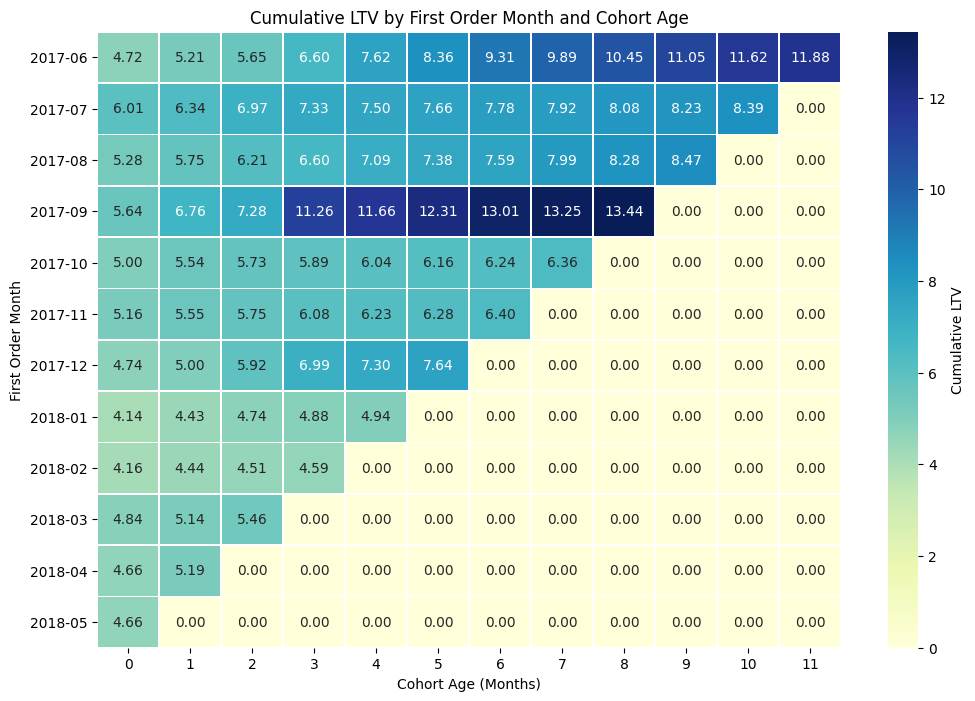

In [150]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    outputed_revenue.cumsum(axis=1).fillna(0),
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="YlGnBu",
    cbar_kws={'label': 'Cumulative LTV'}
)

# Titles and labels
plt.title('Cumulative LTV by First Order Month and Cohort Age')
plt.xlabel('Cohort Age (Months)')
plt.ylabel('First Order Month')

# Show the heatmap
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Values are correct. well done! Much better than Retention. </div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please add a heatmap.</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Great!

</div>
    

# Summary: Sales Analysis Conclusion

The sales analysis covered conversion timing, order frequency, average purchase size, revenue trends, and Lifetime Value (LTV). Most users converted immediately, with 68% converting on the same day and 75% converting within four days. The overall conversion rate was 16%. Customers typically placed just over one order during their first month, with a gradual decline in orders and fewer buyers as cohorts aged. The first cohort reached 2.2 orders per customer, while others remained under two orders.  

The average purchase size was $5.0, with peak revenue in December 2017 and the lowest in June 2017 and January 2018. September and December cohorts outperformed others in average revenue, while June, July, August, and January cohorts showed significant revenue growth in April, possibly due to marketing efforts.  

The September and June cohorts had the highest LTV. The September cohort reached an LTV of 11.26 by the 3rd month and surpassed the June cohort’s annual LTV of 11.88 by the 5th month. Both cohorts experienced growth from December to May, potentially due to holiday sales or successful marketing campaigns. In contrast, January and February cohorts showed lower profitability.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please add a conclusion about step 2.</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Well done!

</div>
    

## Step 5: Marketing
How much money was spent? Overall, per source and over time.

How much did customer acquisition from each of the sources cost?

How worthwhile where the investments? (ROI)

1. How much money was spent? Overall, per source and over time.

In [151]:
#Total amount of money spent
print('Total marketing cost is {}'.format(costs['costs'].sum()))

Total marketing cost is 329131.62


In [152]:
#Total by source
costs_by_source_id = costs.groupby('source_id')['costs'].sum().reset_index(name='costs')
costs_by_source_id

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [153]:
monthly_costs_by_source = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()

fig = px.line(
    monthly_costs_by_source,
    x='cost_month',
    y='costs',
    color='source_id',
    title='Monthly Costs by Source',
    labels={'cost_month': 'Month', 'costs': 'Costs ($)', 'source_id': 'Source ID'},
    markers=True
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Marketing Costs ($)',
    template='plotly_white',
    hovermode='x unified'
)

fig.show()

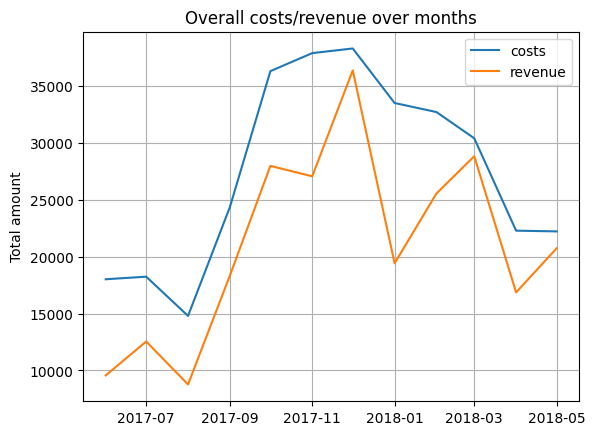

In [154]:
#Total over time
plt.plot(costs.groupby('cost_month').agg({'costs': 'sum'}))
plt.plot(orders.groupby('order_month').agg({'revenue': 'sum'}))
plt.title('Overall costs/revenue over months')
plt.legend(['costs', 'revenue'])
plt.ylabel('Total amount')
plt.grid()
plt.show()

Looking at our marketing data, I notice we're operating with 7 active marketing sources, with sources 3 and 4 carrying the highest costs - source 3 being the most expensive. In contrast, we're investing less in sources 9 and 10.

I identified our highest cost spike on November 24, 2017, involving sources 9, 10, 5, 3, 2, and 1, which appears to be part of our Black Friday campaign. The November-December period shows our highest peaks overall, likely due to Black Friday and New Year holiday promotions.

The period from October to mid-April shows consistently higher marketing costs. After April, most sources maintain similar average costs with fewer fluctuations, though each source shows a significant peak at the end. I noticed sources 9 and 10 have more frequent peaks, while source 5 stands out with one major spike on November 24th but few other significant variations. Sources 1, 2, and 3 follow similar patterns with their major November 24th peaks. Source 4's highest points occur on December 5th and February 10th - the latter possibly tied to Valentine's Day promotions.

When I analyze the correlation between marketing costs and our user metrics (DAU/WAU/MAU), I see clear relationships, including a notable decline in late March to early April. Comparing marketing spend to overall revenue reveals strong correlation patterns. Summer shows lower revenue alongside reduced marketing costs, while September begins an upward trend culminating in December's peak revenue. Interestingly, our late November marketing push appears to have driven these December results.

In [155]:
 first_order_day = orders.groupby('uid')['order_ts'].min()
first_order_day.name = 'first_order_day'
orders = orders.join(first_order_day, on='uid', rsuffix='_right')
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()

orders_grouped_by_cohorts.columns =['first_order_month','order_month','revenue', 'n_users']


In [156]:
orders_grouped_by_cohorts.columns

Index(['first_order_month', 'order_month', 'revenue', 'n_users'], dtype='object')

In [157]:
orders_grouped_by_cohorts['month'] = orders_grouped_by_cohorts['first_order_month'].astype('datetime64[M]')

monthly_revenue_per_user = (
    orders_grouped_by_cohorts.groupby('month')[['revenue', 'n_users']]
    .sum()
    .reset_index()
)
monthly_revenue_per_user['revenue_per_user'] = (monthly_revenue_per_user['revenue'] / monthly_revenue_per_user['n_users']).round(2)

fig = px.line(
    monthly_revenue_per_user,
    x='month',
    y='revenue_per_user',
    title='Monthly Revenue Per User Over Time',
    labels={'month': 'Month', 'revenue_per_user': 'Revenue Per User ($)'},
    markers=True
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Revenue Per User ($)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


# Analysis: Costs Over Time by Source

The graph of marketing Costs Over Time by Source reveals several key patterns in spending. A significant cost spike occurred around November 24, 2017, across multiple sources, likely tied to the Black Friday campaign. The November-December 2017 period shows the highest overall costs, coinciding with holiday promotions, such as Black Friday and New Year’s sales.  

Source 3 consistently showed the highest costs, indicating a heavy marketing investment. Source 4 also had notable spending spikes, especially around December 5 and February 10, 2018, possibly aligning with Valentine’s Day promotions. In contrast, Sources 9 and 10 had lower, more sporadic spending, reflecting their overall lower performance and contribution to revenue.  

Overall, costs appeared to stabilize after April 2018, with fewer fluctuations across most sources. This spending pattern suggests that marketing efforts were concentrated during high-traffic periods, with a more conservative approach during the rest of the year.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great, we have values of total costs and costs by source. And we can see the dynamics of costs and revenue. Very informative! </div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Please add a monthly graph of total costs to show the dynamics. </div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>


We need monthly graph, not daily.
</div>
    

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Something was missing.

Here we need:
- value of total costs - we have it
- values of costs by source - we have it
- monthly graph for total costs - we have it
- monthly graph for costs by source - please add.</div>
    

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Correct!</div>

2. How much did customer acquisition from each of the sources cost?

In [158]:
visits_=visits[visits['uid'].isin(orders['uid'])]

In [159]:
user_info = visits_.groupby('uid')[['device', 'source_id']].apply(lambda x: x.mode().iloc[0]).reset_index()

In [160]:
user_info['source_id'] = user_info['source_id'].astype('int')

In [161]:
user_info.head(10)

0               uid   device  source_id
0   313578113262317  desktop          2
1  1575281904278712    touch         10
2  2429014661409475  desktop          3
3  2464366381792757  desktop          5
4  2551852515556206  desktop          5
5  3077748354309989    touch          3
6  3605148382144603  desktop          2
7  3753586865891862  desktop          4
8  4808417689019433  desktop          4
9  4992223027560440    touch          5

In [162]:
#now to merge the user_info and orders
ordered = pd.merge(orders[['uid', 'revenue', 'order_month', 'first_order_month']], user_info, on='uid')

In [163]:
ordered.head()

uid  revenue order_month first_order_month   device  \
0  10329302124590727494    17.00  2017-06-01        2017-06-01  desktop   
1  11627257723692907447     0.55  2017-06-01        2017-06-01  desktop   
2  17903680561304213844     0.37  2017-06-01        2017-06-01  desktop   
3  16109239769442553005     0.55  2017-06-01        2017-06-01  desktop   
4  14200605875248379450     0.37  2017-06-01        2017-06-01  desktop   

   source_id  
0          1  
1          2  
2          2  
3          2  
4          3

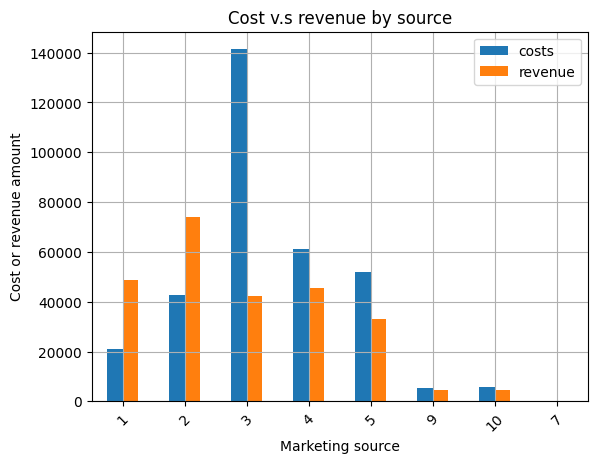

In [164]:
#Now to use the costs data and ordered data too compare cost/revenue by source, and to calculate customer acquisition
cost_by_source=costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
revenue_by_source = ordered.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
pd.merge(cost_by_source, revenue_by_source, on='source_id', how='outer').plot(x='source_id', kind='bar')
plt.title('Cost v.s revenue by source')
plt.xlabel('Marketing source')
plt.ylabel('Cost or revenue amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [165]:
cost_by_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [166]:
revenue_by_source

source_id   revenue
0          1  48606.65
1          2  74123.04
2          3  42127.69
3          4  45420.09
4          5  32866.41
5          7      1.22
6          9   4444.89
7         10   4463.79

In [167]:
# CAC by month calculation
# Add 'year.month' column to the costs DataFrame
costs['costs_year.month'] = costs['date'].dt.strftime('%Y.%m') 
# Transfer 'year.month' column to datetime format
costs['costs_year.month'] = pd.to_datetime(costs['costs_year.month'], format='%Y.%m')
# Costs by month calculation. Group costs dataframe by month
costs_by_month = costs.groupby('costs_year.month')['costs'].sum().reset_index()
# Name dataframe columns
costs_by_month.columns = ['cost_month', 'marketing_cost']
# Display costs by month dataframe
costs_by_month

cost_month  marketing_cost
0  2017-06-01        18015.00
1  2017-07-01        18240.59
2  2017-08-01        14790.54
3  2017-09-01        24368.91
4  2017-10-01        36322.88
5  2017-11-01        37907.88
6  2017-12-01        38315.35
7  2018-01-01        33518.52
8  2018-02-01        32723.03
9  2018-03-01        30415.27
10 2018-04-01        22289.38
11 2018-05-01        22224.27

In [168]:
#Customers per month calculation
customers_per_month = orders.groupby('order_month')['uid'].nunique().reset_index()
#Name new dataframe columns 
customers_per_month.columns = ['cost_month', 'customers']

customers_per_month

cost_month  customers
0  2017-06-01       2023
1  2017-07-01       1984
2  2017-08-01       1472
3  2017-09-01       2750
4  2017-10-01       4675
5  2017-11-01       4547
6  2017-12-01       4942
7  2018-01-01       3898
8  2018-02-01       4258
9  2018-03-01       4181
10 2018-04-01       2744
11 2018-05-01       3544

In [169]:
cac_per_month = pd.merge(costs_by_month, customers_per_month, how='left', on=['cost_month'])
# Calculate Customer Acquisition Cost 
cac_per_month['cac'] = (cac_per_month['marketing_cost']/cac_per_month['customers']).round(2)

cac_per_month.head()

cost_month  marketing_cost  customers    cac
0 2017-06-01        18015.00       2023   8.91
1 2017-07-01        18240.59       1984   9.19
2 2017-08-01        14790.54       1472  10.05
3 2017-09-01        24368.91       2750   8.86
4 2017-10-01        36322.88       4675   7.77

In [170]:
fig = px.line(cac_per_month, x="cost_month", y="cac", title='CAC Over Time')
fig.show()

The Customer Acquisition Cost per source calculation consists of following steps:

1. Identify original source for visitors
2. Add original source to orders table
3. Calculate .1 customers per source by month and .2 costs per source by month
4. Calculate CAC per source by month.

<div class="alert alert-block alert-danger">
<S><b>Reviewer's comment</b> <a class="tocSkip"></a>

You are on the right way! 
    
For CAC by source we should:
    
- Find the day and month of the first purchase of each customer 
- Sort visits by first date and group by first uid. 
- Merge with first orders
- Group table by source_id and first day, count uid
- Add costs using left_on=[source_id first purchase day], right_on=[source_id ad day from costs]
- Calculate CAC, create pivot table and plot a graph. </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct!</div>

In [171]:
#1 
first_source = visits.sort_values('start_ts').groupby('uid').first()['source_id'].reset_index(name = 'original_source')
first_source.head()

uid original_source
0   11863502262781               3
1   49537067089222               2
2  297729379853735               3
3  313578113262317               2
4  325320750514679               5

In [172]:
#2 
merged_data = orders.merge(first_source, how='left', on='uid')[['uid', 'first_order_month', 'first_order_day', 'original_source']]
merged_data.head()

uid first_order_month     first_order_day original_source
0  10329302124590727494        2017-06-01 2017-06-01 00:10:00               1
1  11627257723692907447        2017-06-01 2017-06-01 00:25:00               2
2  17903680561304213844        2017-06-01 2017-06-01 00:27:00               2
3  16109239769442553005        2017-06-01 2017-06-01 00:29:00               2
4  14200605875248379450        2017-06-01 2017-06-01 07:58:00               3

In [173]:
#3.1
customers_per_source_by_month = merged_data.groupby(['first_order_month', 'original_source'])['uid'].nunique().reset_index()
customers_per_source_by_month.columns = ['first_month', 'original_source', 'customers']
customers_per_source_by_month.head()

first_month original_source  customers
0  2017-06-01               1        190
1  2017-06-01              10         95
2  2017-06-01               2        235
3  2017-06-01               3        638
4  2017-06-01               4        413

In [174]:
#3.2
costs_by_month_per_source = costs.groupby(['costs_year.month', 'source_id'])['costs'].sum().reset_index()
costs_by_month_per_source.columns = ['first_month', 'original_source', 'marketing_cost']

costs_by_month_per_source.head()

first_month  original_source  marketing_cost
0  2017-06-01                1         1125.61
1  2017-06-01                2         2427.38
2  2017-06-01                3         7731.65
3  2017-06-01                4         3514.80
4  2017-06-01                5         2616.12

In [175]:
print(customers_per_source_by_month.dtypes)
print('----')
print(costs_by_month_per_source.dtypes)

first_month        datetime64[ns]
original_source          category
customers                   int64
dtype: object
----
first_month        datetime64[ns]
original_source             int64
marketing_cost            float64
dtype: object


In [176]:
customers_per_source_by_month['original_source'] = customers_per_source_by_month['original_source'].astype(int)

In [177]:
#4
cac_per_source = pd.merge(costs_by_month_per_source, customers_per_source_by_month, how='left', on=['first_month', 'original_source'])
cac_per_source.columns = ['first_month', 'source_id', 'marketing_cost', 'customers']
cac_per_source['cac'] = (cac_per_source['marketing_cost']/cac_per_source['customers']).round(2)

cac_per_source.head(10)

first_month  source_id  marketing_cost  customers    cac
0  2017-06-01          1         1125.61        190   5.92
1  2017-06-01          2         2427.38        235  10.33
2  2017-06-01          3         7731.65        638  12.12
3  2017-06-01          4         3514.80        413   8.51
4  2017-06-01          5         2616.12        384   6.81
5  2017-06-01          9          285.22         68   4.19
6  2017-06-01         10          314.22         95   3.31
7  2017-07-01          1         1072.88        160   6.71
8  2017-07-01          2         2333.11        208  11.22
9  2017-07-01          3         7674.37        512  14.99

In [178]:
fig = px.line(
    cac_per_source,
    x='first_month',
    y='cac',
    color='source_id',
    title='CAC Per Source by Month',
    labels={'first_month': 'Month', 'cac_per_source': 'CAC ($)'},
    markers=True
)

fig.show()

# CAC Per Source by Month

The graph of Customer Acquisition Cost (CAC) Per Source by Month highlights key trends in marketing efficiency across various sources over time. Some sources show consistent CAC values, indicating stable marketing efficiency, while others demonstrate fluctuations, likely influenced by seasonal campaigns or changes in marketing strategies.  

Notably, CAC spikes are visible during high-traffic months, such as November and December 2017, potentially driven by holiday marketing efforts like Black Friday and Christmas promotions. For certain sources, CAC declines after these peaks, suggesting better cost control or more efficient customer acquisition efforts post-holiday season.  

Sources with persistently high CAC may indicate inefficient marketing spending or challenges in converting users to customers. Meanwhile, sources with lower or declining CAC reflect more effective campaigns and improved user conversion. Overall, this graph is crucial for identifying which sources are the most cost-efficient and where further optimization may be needed to maximize marketing returns.  

In [179]:
avg_cac_per_source = cac_per_source.groupby('source_id').agg({'marketing_cost': 'sum', 'customers': 'sum'}).reset_index()

avg_cac_per_source['cac'] = (avg_cac_per_source['marketing_cost']/avg_cac_per_source['customers']).round(2)

avg_cac_per_source.sort_values(by='cac', ascending=False)

source_id  marketing_cost  customers    cac
2          3       141321.63      10473  13.49
1          2        42806.04       3506  12.21
4          5        51757.10       6931   7.47
0          1        20833.27       2899   7.19
3          4        61073.60      10295   5.93
5          9         5517.49       1088   5.07
6         10         5822.49       1329   4.38

In [180]:
import plotly.express as px

# Step 1: Calculate Average CAC per Source
avg_cac_per_source = cac_per_source.groupby('source_id').agg({
    'marketing_cost': 'sum', 
    'customers': 'sum'
}).reset_index()

avg_cac_per_source['cac'] = (avg_cac_per_source['marketing_cost'] / avg_cac_per_source['customers']).round(2)

# Step 2: Sort the data by CAC in descending order
avg_cac_per_source = avg_cac_per_source.sort_values(by='cac', ascending=False)

# Step 3: Plot the bar chart
fig = px.bar(
    avg_cac_per_source, 
    x='source_id', 
    y='cac', 
    title='Average CAC Per Source', 
    labels={'source_id': 'Source ID', 'cac': 'Average CAC ($)'},
    text='cac'
)

# Step 4: Customize the chart
fig.update_traces(textposition='outside')  # Show the CAC values outside the bars
fig.update_layout(
    xaxis_title='Source ID',
    yaxis_title='Average CAC ($)',
    template='plotly_white'
)
fig.update_xaxes(type='category')
fig.show()


Customer Acquisition Cost (CAC) peaked during the summer months of June through August before declining. 
The overall average CAC across all periods was 8.02. 
Among different marketing channels, Source ID 3 showed the highest customer acquisition costs, while Source IDs 9 and 10 maintained notably low CAC values. 
Three channels - Source IDs 6, 7, and 8 - had no CAC data available.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You are on the right way! 
    
For CAC per source we need:
    
- find first source per user in visits
- find  first order month and first order day in orders
- merge tables
- group new table by source id and first order day  and count uid
- merge with costs (left using source id and first order day and  right using source id and costs day. )
- calculate cac per source
- plot a graph by month per source </div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Yep!</div>

4. How worthwhile where the investments? (ROI)

In [181]:
#monthly_cost = costs.groupby('cost_month').agg({'costs': 'sum'}).reset_index()

In [182]:
#monthly_cost.head()

In [183]:
reported_revenue.dtypes

first_order_month            object
n_buyers                      int64
order_month          datetime64[ns]
revenue                     float64
age                           int64
ltv                         float64
dtype: object

In [184]:
cac_per_month.dtypes
cac_per_month.head(12)

cost_month  marketing_cost  customers    cac
0  2017-06-01        18015.00       2023   8.91
1  2017-07-01        18240.59       1984   9.19
2  2017-08-01        14790.54       1472  10.05
3  2017-09-01        24368.91       2750   8.86
4  2017-10-01        36322.88       4675   7.77
5  2017-11-01        37907.88       4547   8.34
6  2017-12-01        38315.35       4942   7.75
7  2018-01-01        33518.52       3898   8.60
8  2018-02-01        32723.03       4258   7.69
9  2018-03-01        30415.27       4181   7.27
10 2018-04-01        22289.38       2744   8.12
11 2018-05-01        22224.27       3544   6.27

In [185]:
cac_per_month['cost_month'] = pd.to_datetime(cac_per_month['cost_month'], format='%Y-%m-%d')

In [186]:
reported_revenue['first_order_month'] = pd.to_datetime(reported_revenue['first_order_month'], format='%Y-%m-%d')

In [187]:
report = pd.merge(reported_revenue, cac_per_month, left_on='first_order_month', right_on='cost_month')

In [188]:
#sort firstordermonth
report = report.sort_values(by=['first_order_month', 'age'], ascending=[True, True])

In [189]:
report['cac'] = (report['marketing_cost'] / report['n_buyers']).round(2)
report

first_order_month  n_buyers order_month   revenue  age       ltv  \
0         2017-06-01      2023  2017-06-01   9557.49    0  4.724414   
1         2017-06-01      2023  2017-07-01    981.82    1  0.485329   
2         2017-06-01      2023  2017-08-01    885.34    2  0.437637   
3         2017-06-01      2023  2017-09-01   1931.30    3  0.954671   
4         2017-06-01      2023  2017-10-01   2068.58    4  1.022531   
..               ...       ...         ...       ...  ...       ...   
73        2018-03-01      3533  2018-04-01   1063.05    1  0.300892   
74        2018-03-01      3533  2018-05-01   1114.87    2  0.315559   
75        2018-04-01      2276  2018-04-01  10600.69    0  4.657597   
76        2018-04-01      2276  2018-05-01   1209.92    1  0.531599   
77        2018-05-01      2988  2018-05-01  13925.76    0  4.660562   

   cost_month  marketing_cost  customers   cac  
0  2017-06-01        18015.00       2023  8.91  
1  2017-06-01        18015.00       2023  8.91  
2  2017-06-01        18015.00       2023  8.91  
3  2017-06-01        18015.00       2023  8.91  
4  2017-06-01        18015.00       2023  8.91  
..        ...             ...        ...   ...  
73 2018-03-01        30415.27       4181  8.61  
74 2018-03-01        30415.27       4181  8.61  
75 2018-04-01        22289.38       2744  9.79  
76 2018-04-01        22289.38       2744  9.79  
77 2018-05-01        22224.27       3544  7.44  

[78 rows x 10 columns]

In [190]:
report['roi'] = (report['ltv'] / report['cac']).round(2)
report

first_order_month  n_buyers order_month   revenue  age       ltv  \
0         2017-06-01      2023  2017-06-01   9557.49    0  4.724414   
1         2017-06-01      2023  2017-07-01    981.82    1  0.485329   
2         2017-06-01      2023  2017-08-01    885.34    2  0.437637   
3         2017-06-01      2023  2017-09-01   1931.30    3  0.954671   
4         2017-06-01      2023  2017-10-01   2068.58    4  1.022531   
..               ...       ...         ...       ...  ...       ...   
73        2018-03-01      3533  2018-04-01   1063.05    1  0.300892   
74        2018-03-01      3533  2018-05-01   1114.87    2  0.315559   
75        2018-04-01      2276  2018-04-01  10600.69    0  4.657597   
76        2018-04-01      2276  2018-05-01   1209.92    1  0.531599   
77        2018-05-01      2988  2018-05-01  13925.76    0  4.660562   

   cost_month  marketing_cost  customers   cac   roi  
0  2017-06-01        18015.00       2023  8.91  0.53  
1  2017-06-01        18015.00       2023  8.91  0.05  
2  2017-06-01        18015.00       2023  8.91  0.05  
3  2017-06-01        18015.00       2023  8.91  0.11  
4  2017-06-01        18015.00       2023  8.91  0.11  
..        ...             ...        ...   ...   ...  
73 2018-03-01        30415.27       4181  8.61  0.03  
74 2018-03-01        30415.27       4181  8.61  0.04  
75 2018-04-01        22289.38       2744  9.79  0.48  
76 2018-04-01        22289.38       2744  9.79  0.05  
77 2018-05-01        22224.27       3544  7.44  0.63  

[78 rows x 11 columns]

In [191]:
outputed = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='roi', 
    aggfunc='mean')
outputed.cumsum(axis=1).round(2).fillna('')

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.53  0.58  0.63  0.74  0.85  0.93  1.04  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.74  0.78   0.8  0.82  0.83  0.84  0.86  0.88   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.69  0.71  0.75  0.78   0.8   
2017-09-01         0.60  0.72  0.78   1.2  1.24  1.31  1.38  1.41  1.43         
2017-10-01         0.60  0.66  0.68   0.7  0.72  0.73  0.74  0.75               
2017-11-01         0.55  0.59  0.61  0.64  0.66  0.67  0.68                     
2017-12-01         0.54  0.57  0.68   0.8  0.84  0.88                           
2018-01-01         0.42  0.45  0.48  0.49   0.5                                 
2018-02-01         0.46  0.49   0.5  0.51                                       
2018-03-01         0.56  0.59  0.63                                             
2018-04-01         0.48  0.53                                                   
2018-05-01         0.63                                                         

age                 10    11  
first_order_month             
2017-06-01         1.3  1.33  
2017-07-01         0.9        
2017-08-01                    
2017-09-01                    
2017-10-01                    
2017-11-01                    
2017-12-01                    
2018-01-01                    
2018-02-01                    
2018-03-01                    
2018-04-01                    
2018-05-01

The Customer Acquisition Cost (CAC) analysis across marketing sources reveals significant variations in efficiency. While some sources show high CAC, indicating costly customer acquisition, others demonstrate lower CAC, suggesting more cost-effective channels. This variation highlights opportunities to optimize high-cost sources and potentially increase investment in more efficient channels to improve overall marketing ROI.

The ROI analysis by marketing source reveals varying levels of effectiveness across channels. High-ROI sources demonstrated efficient conversion of marketing spend into revenue, while low or negative ROI sources indicate underperformance where acquisition costs exceeded generated revenue. This insight helps guide strategic decisions on marketing budget allocation for maximum profitability.

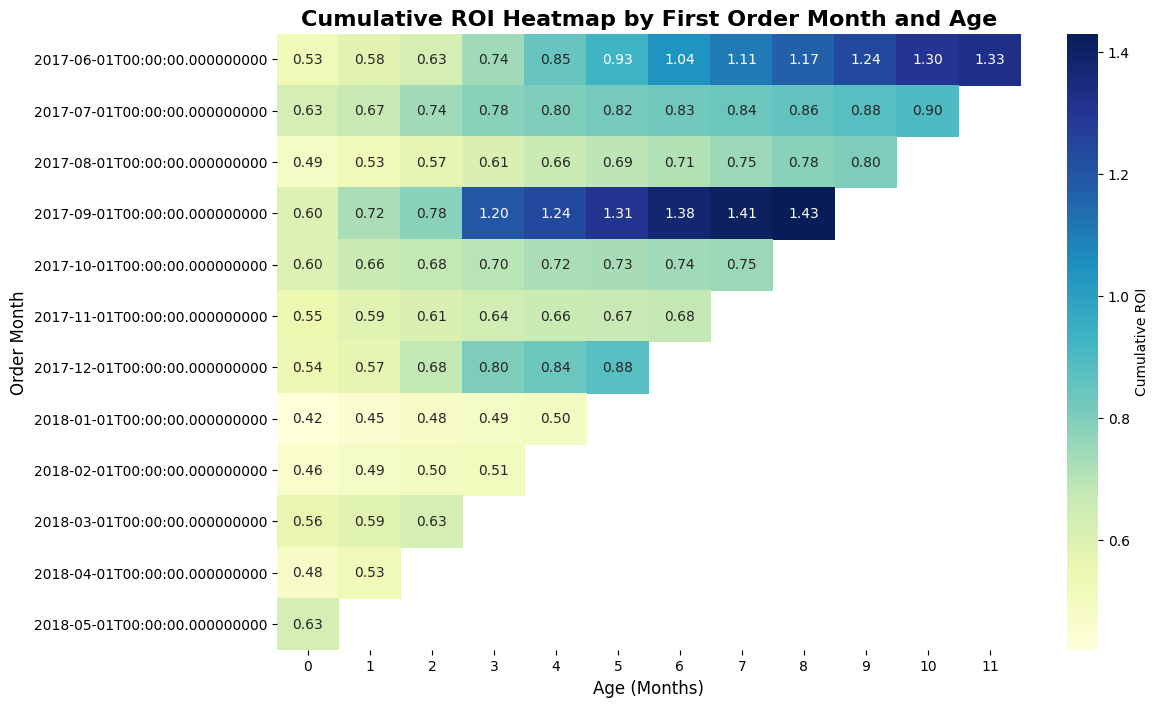

In [192]:
cumulative_roi = outputed.cumsum(axis=1).round(2)


plt.figure(figsize=(12, 8))  
sns.heatmap(
    cumulative_roi,
    annot=True,               
    fmt=".2f",                
    cmap="YlGnBu",            
    cbar_kws={'label': 'Cumulative ROI'}  
)

plt.title('Cumulative ROI Heatmap by First Order Month and Age', fontsize=16, fontweight='bold')
plt.xlabel('Age (Months)', fontsize=12)
plt.ylabel('Order Month', fontsize=12)

plt.show()


The cumulative ROI heatmap analysis reveals varying levels of marketing effectiveness across different cohorts. While some cohorts showed rapid returns through quick customer conversion, others demonstrated gradual but consistent ROI growth. Low-performing cohorts with minimal ROI suggest areas needing marketing strategy improvements. This visualization helps identify successful marketing approaches worth replicating and underperforming strategies requiring optimization.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please check ROI After new CAC. Also we need to add:

- heatmap for total ROI
- conclusion after each graph.</div>

# Final conclusion and recomendations

After reviewing the data, it’s clear that the best places to invest in marketing are sources 1, 4, and 5. Source 1 has a low cost to acquire each customer (CAC) at 5.92 and has brought in 48,606.65 in revenue. Source 4 is also performing well with a CAC of 8.51 and 45,420.09 in revenue. This source is especially good at quickly turning visitors into buyers. Source 5 is another strong performer with a CAC of 6.81 and $32,866.41 in revenue, making it cost-effective and profitable.  

On the other hand, some sources are underperforming. Source 3 is the most expensive, with a CAC of 12.12 but only 42,127.69 in revenue. It doesn’t offer a good return for the cost. Sources 9 and 10 are doing the worst, bringing in less than 5,000 each, with high costs and few customer conversions. These sources may need a big change in strategy or a reduction in spending.  

To make these recommendations, we focused on key numbers. CAC helped us see how much it costs to get each new customer. We used return on investment (ROI) to compare the money made with what was spent. We also looked at how much revenue each source brought in and how quickly they turned visitors into buyers.  

In summary, it’s best to focus more spending on sources 1, 4, and 5 because they’re the most efficient and profitable. Spending on sources 3, 9, and 10 should be reduced or reallocated to better-performing sources. If sources 9 and 10 are to be improved, the marketing strategy needs to be revisited, such as targeting the right audience or improving the ad messaging. By shifting funds to the best-performing sources, the marketing team can get better results and lower costs overall.